## Парадокс Эренфестов

Две собаки сидят бок о бок, страдая от $N \gg 1$ блох. Каждая блоха в промежутке времени $[t, t+h)$ с вероятностью $\lambda h + o(h)$, независимо от остальных, перескакивает на соседнюю собаку. В начальный момент все блохи находятся на собаке с номером $1$. 



In [33]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np
import random

## Каждая блоха индивидуальна:

Каждая блоха сама решает, что ей делать. Ее переход на соседнюю собаку - случайная величина $\xi \in Be(\lambda \cdot \Delta t)$, где $\Delta t$ - время обновление одной итерации. Рассмитрим итерацию обновления одной блохи:

1) Блоха попала на $i$ ячейку

2) Генерируем $q \in [0,1]$.

3) Если $q < \lambda \cdot \Delta t$ - перескакиваем.




In [34]:
def individual_bloh(N, lambd, T, delta_T):
    gr1_x = np.array([])
    gr1_y = np.array([])

    blohi = np.array([]) 
    for i in range(N):
        blohi = np.append(blohi, 0)
       
    time1 = 0
    while (time1 < T):
        for i in range(N):
            if (random.random() < lambd * delta_T):
                blohi[i] = (blohi[i] + 1) % 2     
        N1 = 0
        for i in range(N):
            if (blohi[i] == 0):
                N1 += 1

        gr1_x = np.append(gr1_x, time1)
        gr1_y = np.append(gr1_y, N1)
        time1 += delta_T
    
    return gr1_x, gr1_y

Графики

In [35]:
def graph_ind(N, lambd, T, delta_T):
    gr1_x, gr1_y = individual_bloh(N, lambd, T, delta_T)
    fig1, ax1 = plt.subplots()                        # будет 1 график, на нем:
    ax1.plot(gr1_x, gr1_y, color="blue")      # функция y1(x), синий, надпись y(x)
    ax1.set_xlabel("time")                              # подпись у горизонтальной оси х
    ax1.set_ylabel("N1")                              # подпись у вертикальной оси y

    ax1.set_title('Индвидуальное поведение блох')
    plt.ylim(0, N)
    plt.xlim(0, T)  
    plt.show()  
        
    return 0

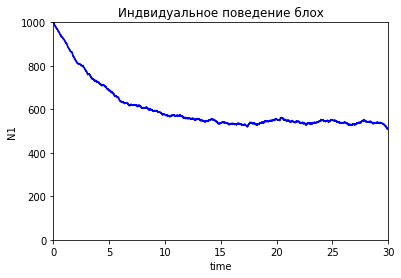

0

In [42]:
N = 1000
lambd = 0.1
T = 30
delta_T = 0.001
graph_ind(N, lambd, T, delta_T)

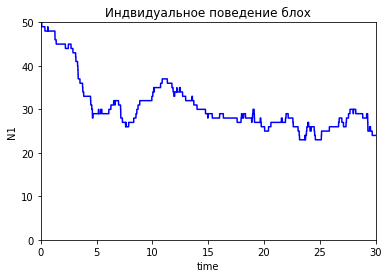

0

In [45]:
N = 50
lambd = 0.1
T = 30
delta_T = 0.001
graph_ind(N, lambd, T, delta_T)

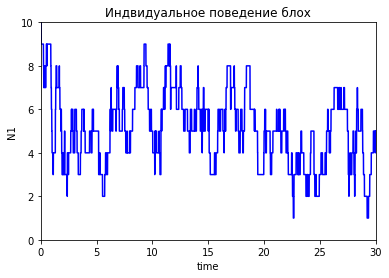

0

In [39]:
N = 10
lambd = 1
T = 30
delta_T = 0.001
graph_ind(N, lambd, T, delta_T)

## Моделирование всей цепи.

Теперь же блохи действуют как единный организм. Если на первой собаке в какой-то момент времени $N_1$ блох, то:

1) $N_1$ увеличится с распределением Бернулли с коэффициентом $ \lambda \cdot (N - N_1) \cdot \Delta t  $

2) $N_1$ уменьшается с распределением Бернулли с коэффициентом $ \lambda \cdot N_1 \cdot \Delta t   $

Если в процессе программы она совершает оба действия одновременна, то $ N_1$ остается прежним.

In [27]:
def rand(N, N1, lambd, delta_T):

    P_change_right = delta_T * lambd * N1 
    P_change_left =  delta_T * lambd * (N - N1) 
    right = 0
    left = 0 
    if (random.random() < P_change_right):
        right = -1
    if (random.random() < P_change_left):
        left = 1   
    return right + left

def chain(N, lamd, T, delta_T):
   
    gr1_x = np.array([])
    gr1_y = np.array([])
    N1 = N
    time1 = 0

    while (time1 < T):
        a = rand(N, N1, lambd, delta_T)
        N1 = N1 + a
        gr1_x = np.append(gr1_x, time1)
        gr1_y = np.append(gr1_y, N1)
        time1 += delta_T
    
    return gr1_x, gr1_y


Графики

In [28]:
def graph_chain(N, lambd, T, delta_T):
    gr1_x, gr1_y = chain(N, lambd, T, delta_T)
    fig1, ax1 = plt.subplots()                        # будет 1 график, на нем:
    ax1.plot(gr1_x, gr1_y, color="blue")      # функция y1(x), синий, надпись y(x)
    ax1.set_xlabel("time")                              # подпись у горизонтальной оси х
    ax1.set_ylabel("N1")                              # подпись у вертикальной оси y
    ax1.set_title('Моделирование всей цепи')
    plt.ylim(0, N)
    plt.xlim(0, T)        
    plt.show()   
    return 0

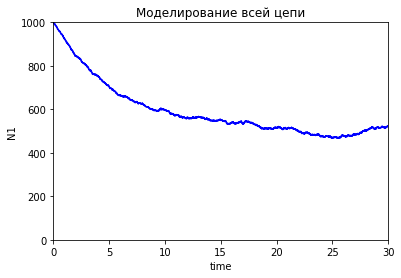

0

In [30]:
N = 1000
lambd = 0.1
T = 30
delta_T = 0.001
graph_chain(N, lambd, T, delta_T)

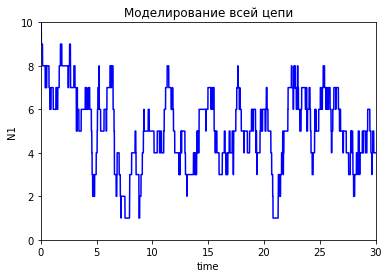

0

In [41]:
N = 10
lambd = 1
T = 30
delta_T = 0.001
graph_chain(N, lambd, T, delta_T)

## Моделирование закона Фика 

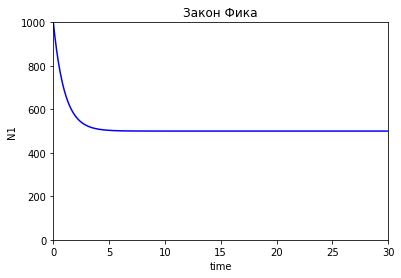

In [43]:
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np
import random
import math

def Phik(N, tau, T, delta_T):
    gr1_x = np.array([])
    gr1_y = np.array([])

    time1 = 0
    while (time1 < T):
        gr1_x = np.append(gr1_x, time1)
        gr1_y = np.append(gr1_y, 1/2 * N * (1 + math.exp(-time1 / tau)))
        time1 += delta_T
    return gr1_x, gr1_y


N = 1000
T = 30
delta_T = 0.001
tau = 1
gr1_x, gr1_y = Phik(N, tau, T, delta_T)
    
fig1, ax1 = plt.subplots()                        # будет 1 график, на нем:
ax1.plot(gr1_x, gr1_y, color="blue")      # функция y1(x), синий, надпись y(x)
ax1.set_xlabel("time")                              # подпись у горизонтальной оси х
ax1.set_ylabel("N1")                              # подпись у вертикальной оси y
ax1.set_title('Закон Фика')
plt.ylim(0, N)
plt.xlim(0, T)

#Подбор tau:
#i = 0
#while True:
#    if (abs(gr1_y[i] - 600) < 1):
#        print(i, gr1_y[i])
#        break
#    i += 1
    
plt.show() 


Заметим, что при наложении, графики практически совпадают:

Text(0.5, 1.0, 'Наложение двух моделей')

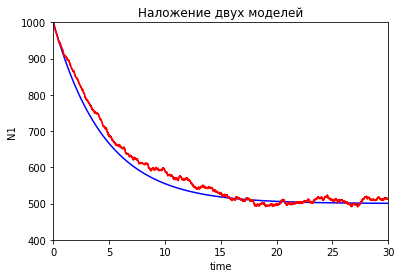

In [16]:
N = 1000
T = 30
delta_T = 0.001
tau = 4.53
lambd = 0.1

gr1_x, gr1_y = Phik(N, tau, T, delta_T)
gr2_x, gr2_y = individual_bloh(N, lambd, T, delta_T)
    
fig1, ax1 = plt.subplots()                        # будет 1 график, на нем:
ax1.plot(gr1_x, gr1_y, color="blue")      # функция y1(x), синий, надпись y(x)
ax1.plot(gr2_x, gr2_y, color="red")
ax1.set_xlabel("time")                              # подпись у горизонтальной оси х
ax1.set_ylabel("N1")                              # подпись у вертикальной оси 
plt.ylim(N/2 - N/10, N)
plt.xlim(0, T)
ax1.set_title('Наложение двух моделей')



## Создание анимации:

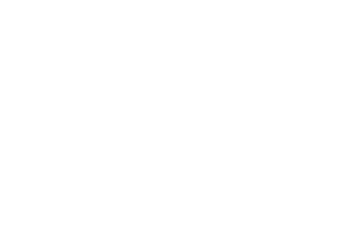

In [46]:
N = 1000
T = 10
delta_T = 0.1
tau = 4.53
lambd = 0.1

gr_x, gr_y = individual_bloh(N, lambd, T, delta_T)
gr1_x, gr1_y = Phik(N, tau, T, delta_T)


interval_ = 20
frame_ = int(T / delta_T)
max_x = 10

fig = plt.figure()
ax = plt.axes(xlim=(0, max_x), ylim=(N/2 - N/10, N))
#line, = ax.plot([], [], lw=2)
 
# Функция инициализации.
def init():
    # создение пустого графа.
    return 1

xdata, ydata = [], []
xdata1, ydata1 = [], [] 
 
# функция анимации
def animate(i):
    
    global gr_x
    global gr_y
    x = gr_x[i]
    y = gr_y[i]
    global gr1_x
    global gr1_y
    x1 = gr1_x[i]
    y1 = gr1_y[i]

    global xdata
    global ydata
    global xdata1
    global ydata1
    
    ydata = np.append(ydata, y)
    xdata = np.append(xdata, x)
    ydata1 = np.append(ydata1, y1)
    xdata1 = np.append(xdata1, x1)
    if (i * delta_T > max_x): 
        xdata = np.delete(xdata, 0)
        ydata = np.delete(ydata, 0)
        xdata1 = np.delete(xdata1, 0)
        ydata1 = np.delete(ydata1, 0)
   
    ax.clear() 
    ax.plot(xdata, ydata, color="blue")
    ax.plot(xdata1, ydata1, color= "red")
    
    
  #  line.set_data(xdata, ydata)
    return 1
 
 
# Заголовок анимации
plt.title('')
# Скрываем лишние данные
plt.axis('off')
 
# Вызов анимации.
anim1 =  matplotlib.animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_, interval=interval_)


In [47]:
anim1